In [2]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

plt.style.use("ggplot")

In [3]:
def plot_samples_and_poly_predictions(X, y, model, n):
    """
    This function plots X and y of the sample data and visualizes the predictions
    of a given linear scikit learn model. The X values are 
    """

    fig, ax = plt.subplots()
    ax.scatter(X, y, s=4, label="Samples")

    X_pred = np.linspace(np.min(X), np.max(X), 100)
    X_pred_poly = np.vander(X_pred, N=n+1)

    y_plot = model.predict(X_pred_poly)

    ax.plot(
        X_pred,
        y_plot,
        linewidth=2,
        label="Model",
    )
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()
    
    fig.tight_layout()

In [4]:
def plot_samples(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X, y, s=4, label="Samples")
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

In [5]:
def load_dataset_csv(data_path):
    """Reads from a csv file assuming two columns (2D) representing X and y
    of a regression problem."""
    with open(data_path, newline='') as f:
        csv_reader = csv.reader(f)    

        next(csv_reader)

        X = []
        y = []

        for row in csv_reader:
            X.append(row[0])
            y.append(row[1])
        
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)

    return X, y

In [6]:
def kfold_crossval(regressor, X, y, k=10):
    """Function to evaluate a scikit learn model in 10-fold shuffled
    split cross validation. 
    """
    shuffled_kfold = ShuffleSplit(n_splits=k, train_size=0.9, random_state=42)
    val_losses = np.empty((k,))
    train_losses = np.empty((k,))

    for i, (train_index, val_index) in enumerate(shuffled_kfold.split(X)): 

        # scikit learn implementation of shuffled cross_validation
        # defines splits by returning indices to the provided np arrays
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # all scikit-learn estimators provide a fit function for training
        regressor.fit(X_train, y_train)

        y_val_pred = regressor.predict(X_val)
        y_train_pred = regressor.predict(X_train)
        val_losses[i] = mean_squared_error(y_val, y_val_pred)
        train_losses[i] = mean_squared_error(y_train, y_train_pred)

    mean_val_loss = np.mean(val_losses)
    mean_train_loss = np.mean(train_losses)
    
    return mean_val_loss, mean_train_loss

In [7]:
def regularization_path(X, y, alphas):
    """Samples a regularization path given X, y and alphas (regularization
    parameters) for a linear, l2 regularized model.""" 

    mean_val_losses = np.empty((len(alphas),))
    mean_train_losses  = np.empty((len(alphas),))

    regressor = Ridge(fit_intercept=False)

    for i, alpha in enumerate(alphas):
        # set the regularization for each evaluation of the path
        regressor.set_params(alpha=alpha)
        
        mean_val_loss, mean_train_loss = kfold_crossval(regressor = regressor, X = X, y = y)
        
        mean_val_losses[i] = mean_val_loss
        mean_train_losses[i] = mean_train_loss
                
    fig, ax = plt.subplots()
    ax.plot(alphas, mean_val_losses, label='Validation loss')
    ax.plot(alphas, mean_train_losses, label='Train loss')
    ax.set_xscale('log')
    ax.invert_xaxis()
    ax.set_xlabel("Regularization parameter / alpha")
    ax.set_ylabel("Loss / mean squared error")
    ax.legend()
    
    idx = np.argmin(mean_val_losses)
    print('Best validation error:', mean_val_losses[idx])
    print('Corresponding train error:', mean_train_losses[idx])
    print('Corresponding alpha:', alphas[idx])

    return Ridge(fit_intercept=False, alpha=alphas[idx])

### regularization_dataset0

In [9]:
X, y = load_dataset_csv("regularization_dataset0.csv")

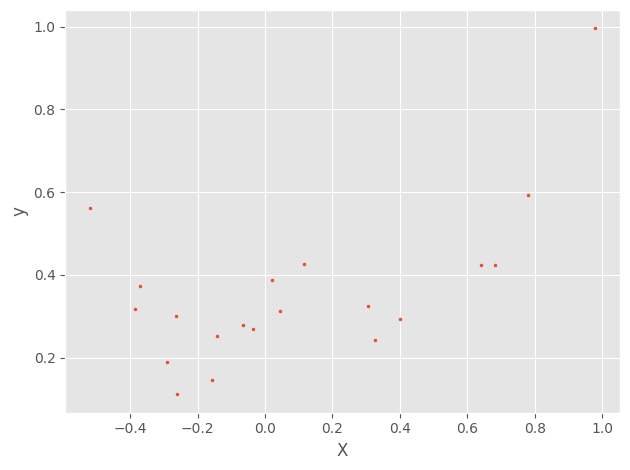

In [10]:
plot_samples(X, y)

ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x13eed4440>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x12fe79840>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x12fe79840>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x12fe79840>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<

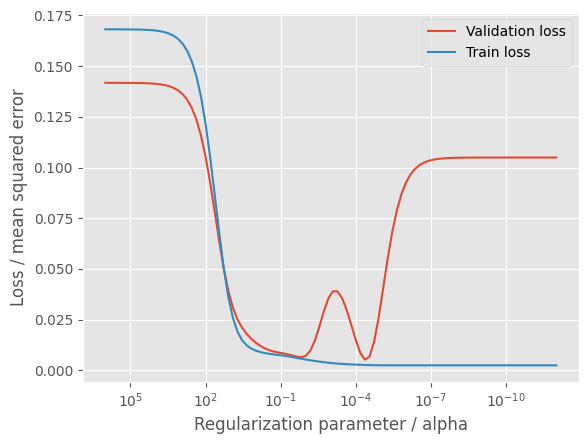

In [11]:
# cover large parameter space by considering parameters on log scale
alphas = np.logspace(-12, 6, num=100, base=10)
poly_degree = 6
X_poly = np.vander(X, N=poly_degree+1)

best_model = regularization_path(X=X_poly, y=y, alphas=alphas)

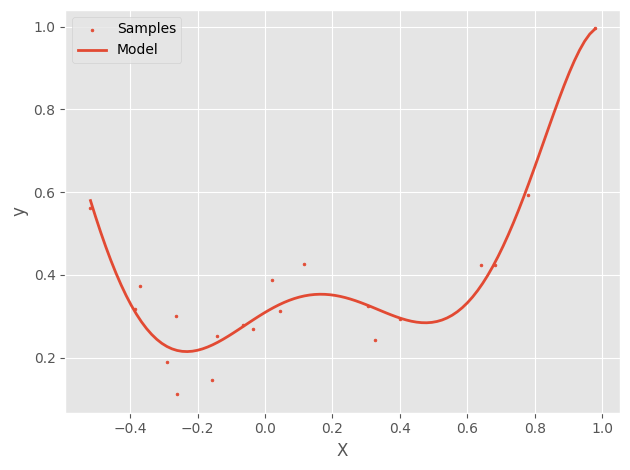

In [12]:
best_model.fit(X_poly, y)
plot_samples_and_poly_predictions(X=X, y=y, model=best_model, n=6)

## regularization_dataset1

In [13]:
X, y = load_dataset_csv("regularization_dataset1.csv")

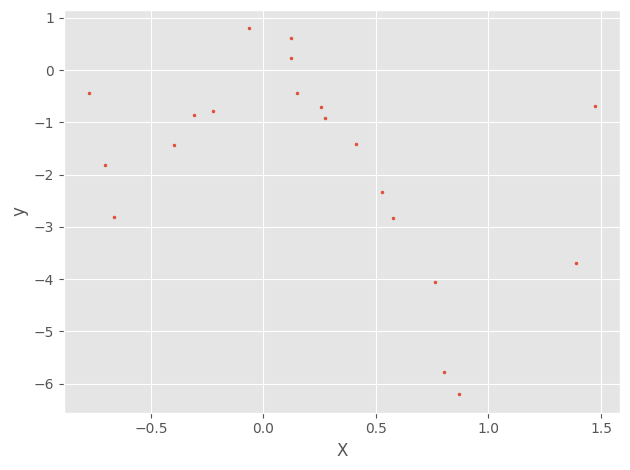

In [14]:
plot_samples(X, y)

ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x13eed7240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x109806240>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<generator object BaseShuffleSplit.split at 0x12fe79840>
ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=0.9)
<

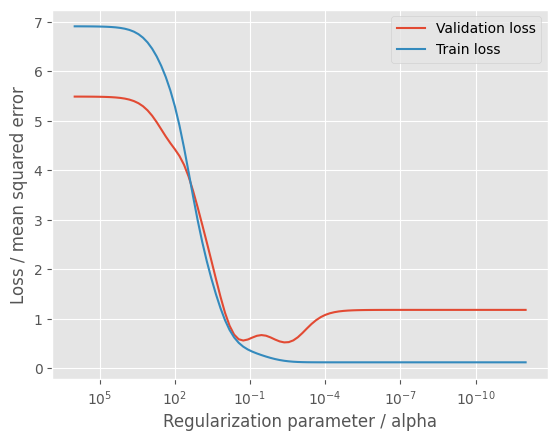

In [15]:
# cover large parameter space by considering parameters on log scale
alphas = np.logspace(-12, 6, num=100, base=10)
poly_degree = 6
X_poly = np.vander(X, N=poly_degree+1)

best_model = regularization_path(X=X_poly, y=y, alphas=alphas)

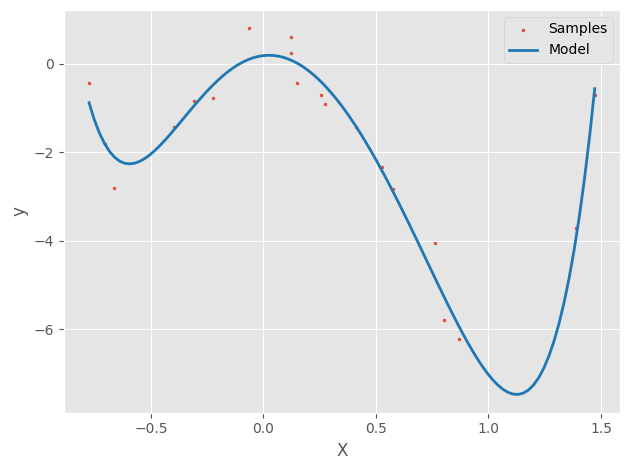

In [63]:
best_model.fit(X_poly, y)
plot_samples_and_poly_predictions(X=X, y=y, model=best_model, n=6)